## Part 2

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


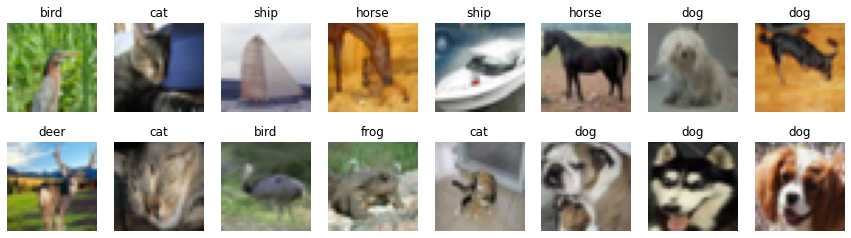

In [5]:
import matplotlib.pyplot as plt
import numpy as np
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()


In [13]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
import pandas as pd
from tensorflow.keras.optimizers import Adam

In [15]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [16]:
model = Sequential()
model.add(Conv2D(16, (3, 3), strides = (1, 1), padding="same", name = 'conv1', input_shape=(32, 32, 3)))   
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, (3, 3), strides = (1, 1), padding="same", name = 'conv2'))  
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D((2, 2), name='max_pool_1'))
model.add(Dropout(0.25, noise_shape=None, seed=0))
model.add(Conv2D(32, (3, 3), strides = (1, 1), padding="same", name = 'conv3')) 
model.add(LeakyReLU(0.1))
model.add(Conv2D(64, (3, 3), strides = (1, 1), padding="same", name = 'conv4'))  
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D((2, 2), name='max_pool_2'))
model.add(Dropout(0.25, noise_shape=None, seed=0))
model.add(Flatten())    
model.add(Dense(256, name='fc1'))
model.add(Dropout(0.5, noise_shape=None, seed=0))
model.add(Dense(number_of_classes))
model.add(Activation("softmax"))  

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=0)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 16, 16, 32)        0         
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 16, 16, 32)       